In [1]:
# Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas.plotting import scatter_matrix

# Import your data loading utilities
import sys
project_root_nb = os.path.abspath(os.path.join(os.getcwd(), "..")) 
if project_root_nb not in sys.path:
    sys.path.insert(0, project_root_nb)

from analysis.utils.data_loading import (
    dispose_sa_engine_connections,
    fetch_klines_df, 
    fetch_features_df,
    combine_klines_and_features
)

# --- Notebook Configuration ---
# --- Data Selection for Multi-Symbol Analysis ---
TARGET_TICKERS_MULTI = ["BTCUSDT", "ETHUSDT", "SOLUSDT", "XRPUSDT" ] # Added more "DOGEUSDT"
TARGET_INTERVAL_MULTI = "1h" 
TARGET_FEATURE_SET_VERSION_MULTI = "my_exp_features" # <<< Ensure this version has features for all TARGET_TICKERS_MULTI

FETCH_START_DATE_MULTI = "2023-01-01 00:00:00" 
FETCH_END_DATE_MULTI = "2025-05-20 00:00:00"
FETCH_LIMIT_MULTI = None 

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-darkgrid') 
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120) # Adjusted for potentially more columns

In [2]:
# Load Kline and Feature Data for Multiple Tickers
all_klines_multi = {}    
all_features_multi = {}  
all_combined_multi = {}  

try:
    print("--- Loading Kline and Feature Data for Multiple Tickers ---")
    for ticker in TARGET_TICKERS_MULTI:
        print(f"\nProcessing Ticker: {ticker}")
        # Fetch Klines
        klines_df_ticker = fetch_klines_df(
            ticker, TARGET_INTERVAL_MULTI, FETCH_START_DATE_MULTI, 
            FETCH_END_DATE_MULTI, FETCH_LIMIT_MULTI
        )
        if not klines_df_ticker.empty: all_klines_multi[ticker] = klines_df_ticker
        else: print(f"  No kline data for {ticker}.")

        # Fetch Features
        features_df_ticker = fetch_features_df(
            TARGET_FEATURE_SET_VERSION_MULTI, ticker, TARGET_INTERVAL_MULTI,
            FETCH_START_DATE_MULTI, FETCH_END_DATE_MULTI, FETCH_LIMIT_MULTI
        )
        if not features_df_ticker.empty: all_features_multi[ticker] = features_df_ticker
        else: print(f"  No features for {ticker} (Version: {TARGET_FEATURE_SET_VERSION_MULTI}).")

        # Combine
        if ticker in all_klines_multi and ticker in all_features_multi:
            combined_df_ticker = combine_klines_and_features(all_klines_multi[ticker], all_features_multi[ticker])
            if not combined_df_ticker.empty: all_combined_multi[ticker] = combined_df_ticker
            else: print(f"  Combination empty for {ticker}.")
            
except Exception as e:
    print(f"Error during multi-ticker data loading: {e}")
    import traceback; traceback.print_exc()

if all_combined_multi:
    first_ticker_with_data = next(iter(all_combined_multi), None)
    if first_ticker_with_data:
        print(f"\n--- Sample Combined Data for {first_ticker_with_data} (first 3 rows) ---")
        display(all_combined_multi[first_ticker_with_data].head(3))
elif all_features_multi: 
    first_ticker_with_data = next(iter(all_features_multi), None)
    if first_ticker_with_data:
        print(f"\n--- Sample Feature Data for {first_ticker_with_data} (first 3 rows) ---")
        display(all_features_multi[first_ticker_with_data].head(3))

--- Loading Kline and Feature Data for Multiple Tickers ---

Processing Ticker: BTCUSDT
Initializing SQLAlchemy engine for analysis utilities...
SQLAlchemy engine initialized successfully for analysis.
Fetching klines from: klines_1hour for BTCUSDT (1h) via SQLAlchemy
Fetching features from: kline_features_my_exp_features for BTCUSDT (1h) via SQLAlchemy

Processing Ticker: ETHUSDT
Fetching klines from: klines_1hour for ETHUSDT (1h) via SQLAlchemy
Fetching features from: kline_features_my_exp_features for ETHUSDT (1h) via SQLAlchemy

Processing Ticker: SOLUSDT
Fetching klines from: klines_1hour for SOLUSDT (1h) via SQLAlchemy
Fetching features from: kline_features_my_exp_features for SOLUSDT (1h) via SQLAlchemy

Processing Ticker: XRPUSDT
Fetching klines from: klines_1hour for XRPUSDT (1h) via SQLAlchemy
Fetching features from: kline_features_my_exp_features for XRPUSDT (1h) via SQLAlchemy

--- Sample Combined Data for BTCUSDT (first 3 rows) ---


,symbol_id,open,high,low,close,volume,quote_asset_volume,adx_14,adx_21,atr_14,atr_21,bbands_lower_20_1,bbands_lower_20_2,bbands_middle_20_1,bbands_middle_20_2,bbands_upper_20_1,bbands_upper_20_2,cci_14,cci_20,close_price_ema_100p,close_price_ema_12p,close_price_ema_200p,close_price_ema_21p,close_price_ema_26p,close_price_ema_50p,...,momentum_ema_10p,momentum_ema_21p,momentum_ema_50p,obv,quote_asset_volume_base,quote_asset_volume_sum_10p,quote_asset_volume_sum_20p,quote_asset_volume_sum_50p,rsi_14,rsi_21,rsi_7,stoch_slowd,stoch_slowk,volatility_std_100p,volatility_std_20p,volatility_std_50p,volume_base,volume_ema_20p,volume_ema_50p,volume_std_20p,volume_std_50p,volume_sum_10p,volume_sum_20p,volume_sum_50p,ingested_at
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,1,42283.58,42554.57,42261.02,42475.23,1271.68108,5.395725e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1271.68108,5.395725e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1271.68108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-20 14:29:11.531248+00:00
2024-01-01 01:00:00+00:00,1,42475.23,42775.00,42431.65,42613.56,1196.37856,5.098489e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2468.05964,5.098489e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1196.37856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-20 14:29:11.531248+00:00
2024-01-01 02:00:00+00:00,1,42613.57,42638.41,42500.00,42581.10,685.21980,2.916738e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1782.83984,2.916738e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.21980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-20 14:29:11.531248+00:00



--- Comparing 'rsi_14' Across Tickers ---


,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT
time,,,,
2024-01-01 00:00:00+00:00,NaN,50.503936,44.813378,40.497889
2024-01-01 01:00:00+00:00,NaN,55.057105,54.294783,45.845123
2024-01-01 02:00:00+00:00,NaN,48.761397,52.365982,40.555064
2024-01-01 03:00:00+00:00,NaN,39.932841,49.628397,36.995847
2024-01-01 04:00:00+00:00,NaN,43.239784,47.680075,35.062736


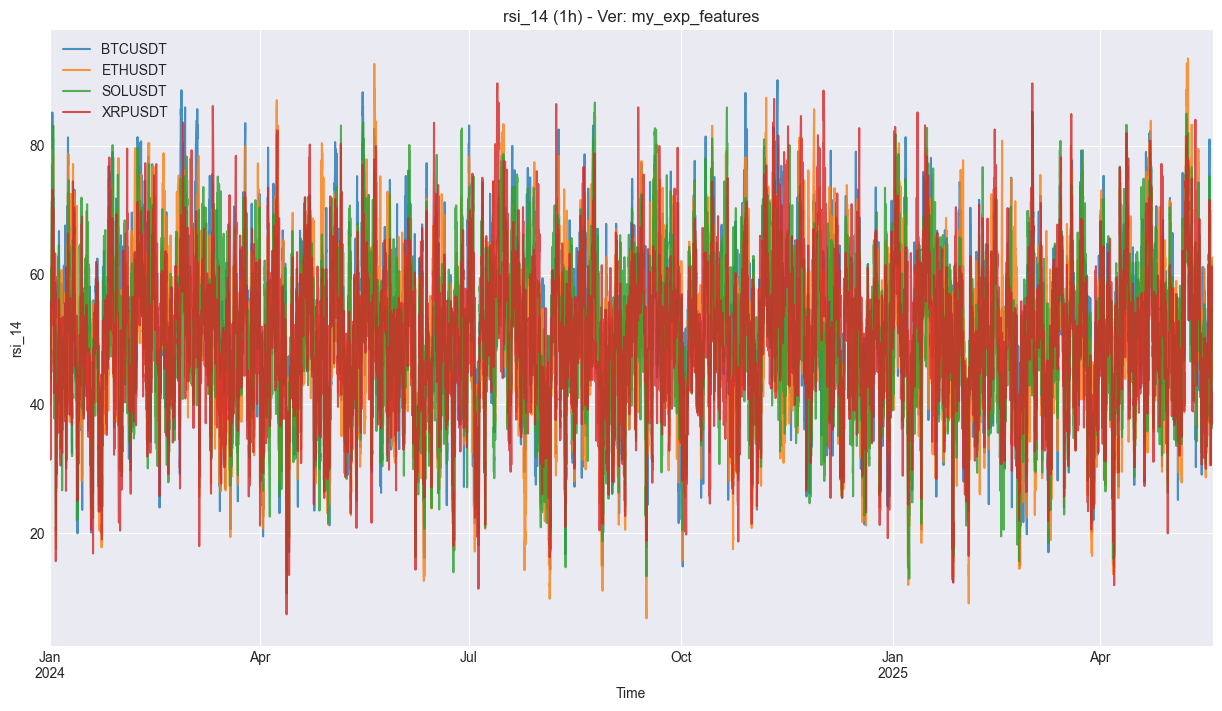


--- Correlation Matrix for 'rsi_14' (NaNs dropped) ---


,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT
BTCUSDT,1.000000,0.805760,0.772889,0.662822
ETHUSDT,0.805760,1.000000,0.726687,0.637776
SOLUSDT,0.772889,0.726687,1.000000,0.630854
XRPUSDT,0.662822,0.637776,0.630854,1.000000


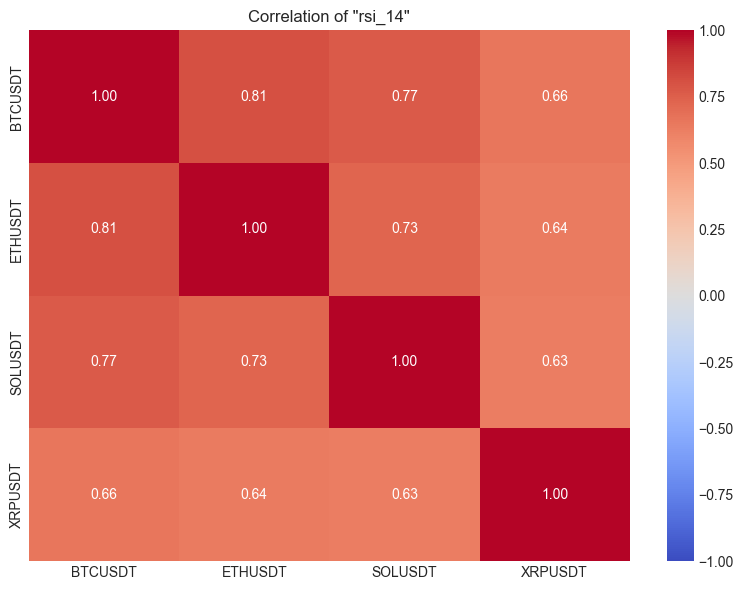

In [3]:
# Cross-Ticker Feature Comparison 
FEATURE_TO_COMPARE_MULTI = 'rsi_14' 

if all_features_multi: # Use all_features_multi as it's the direct source
    print(f"\n--- Comparing '{FEATURE_TO_COMPARE_MULTI}' Across Tickers ---")
    comparison_df = pd.DataFrame()
    for ticker, features_df in all_features_multi.items():
        if FEATURE_TO_COMPARE_MULTI in features_df.columns:
            comparison_df[ticker] = features_df[FEATURE_TO_COMPARE_MULTI] 
        else: print(f"Warn: Feature '{FEATURE_TO_COMPARE_MULTI}' not found for {ticker}.")

    if not comparison_df.empty:
        display(comparison_df.head())
        plt.figure(figsize=(15, 8))
        for col in comparison_df.columns: comparison_df[col].plot(label=col, alpha=0.8)
        plt.title(f'{FEATURE_TO_COMPARE_MULTI} ({TARGET_INTERVAL_MULTI}) - Ver: {TARGET_FEATURE_SET_VERSION_MULTI}')
        plt.ylabel(FEATURE_TO_COMPARE_MULTI); plt.xlabel('Time'); plt.legend(); plt.grid(True); plt.show()

        if len(comparison_df.columns) > 1:
            comparison_df_cleaned = comparison_df.dropna()
            if len(comparison_df_cleaned) > 1 :
                corr_matrix = comparison_df_cleaned.corr()
                print(f"\n--- Correlation Matrix for '{FEATURE_TO_COMPARE_MULTI}' (NaNs dropped) ---")
                display(corr_matrix)
                plt.figure(figsize=(max(8, len(comparison_df.columns)*1.2), max(6, len(comparison_df.columns)*0.9)))
                sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1); plt.title(f'Correlation of "{FEATURE_TO_COMPARE_MULTI}"'); plt.tight_layout(); plt.show()
    else: print(f"Could not create comparison DataFrame for '{FEATURE_TO_COMPARE_MULTI}'.")
else: print("No feature data loaded. Run Cell 3.")


--- Analyzing Cross-Asset Correlation for 'log_return_base' ---


,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT
time,,,,
2024-01-01 00:00:00+00:00,NaN,0.005960,0.002357,0.000974
2024-01-01 01:00:00+00:00,0.003251,0.003570,0.020964,0.003726
2024-01-01 02:00:00+00:00,-0.000762,-0.004655,-0.004138,-0.005025
2024-01-01 03:00:00+00:00,-0.005903,-0.008413,-0.005997,-0.003908
2024-01-01 04:00:00+00:00,0.001640,0.002521,-0.004376,-0.002286


Cleaned returns for correlation: 12120 rows.

--- Cross-Asset 'log_return_base' Correlation Matrix ---


,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT
BTCUSDT,1.000000,0.799408,0.743770,0.601157
ETHUSDT,0.799408,1.000000,0.734032,0.633976
SOLUSDT,0.743770,0.734032,1.000000,0.598491
XRPUSDT,0.601157,0.633976,0.598491,1.000000


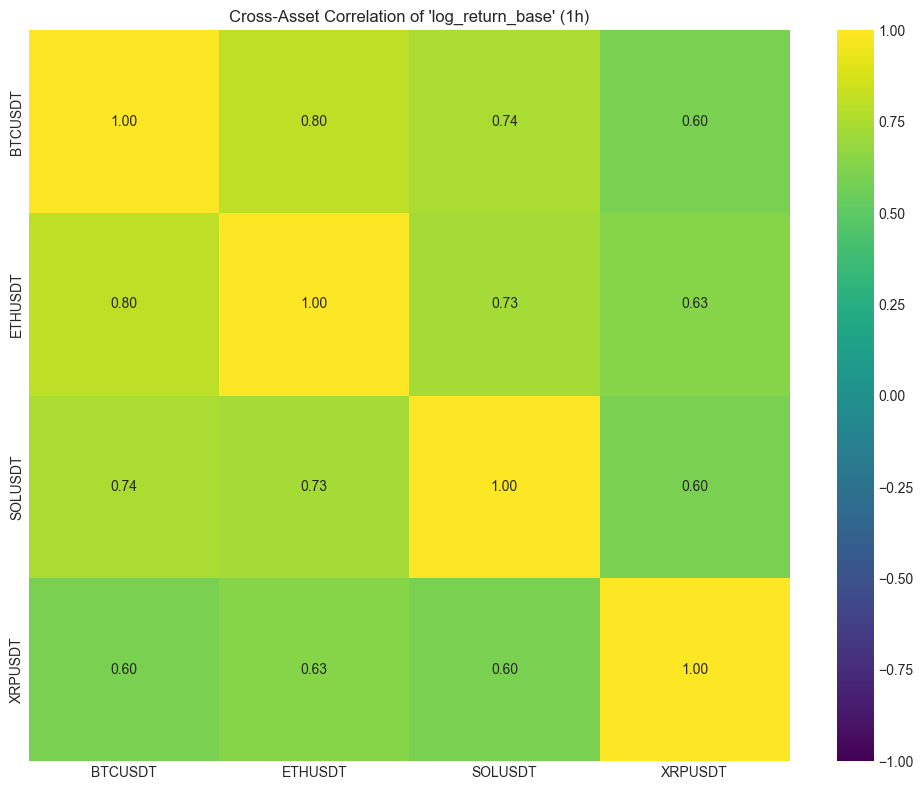


--- Pair Plot of Returns (Sample) ---


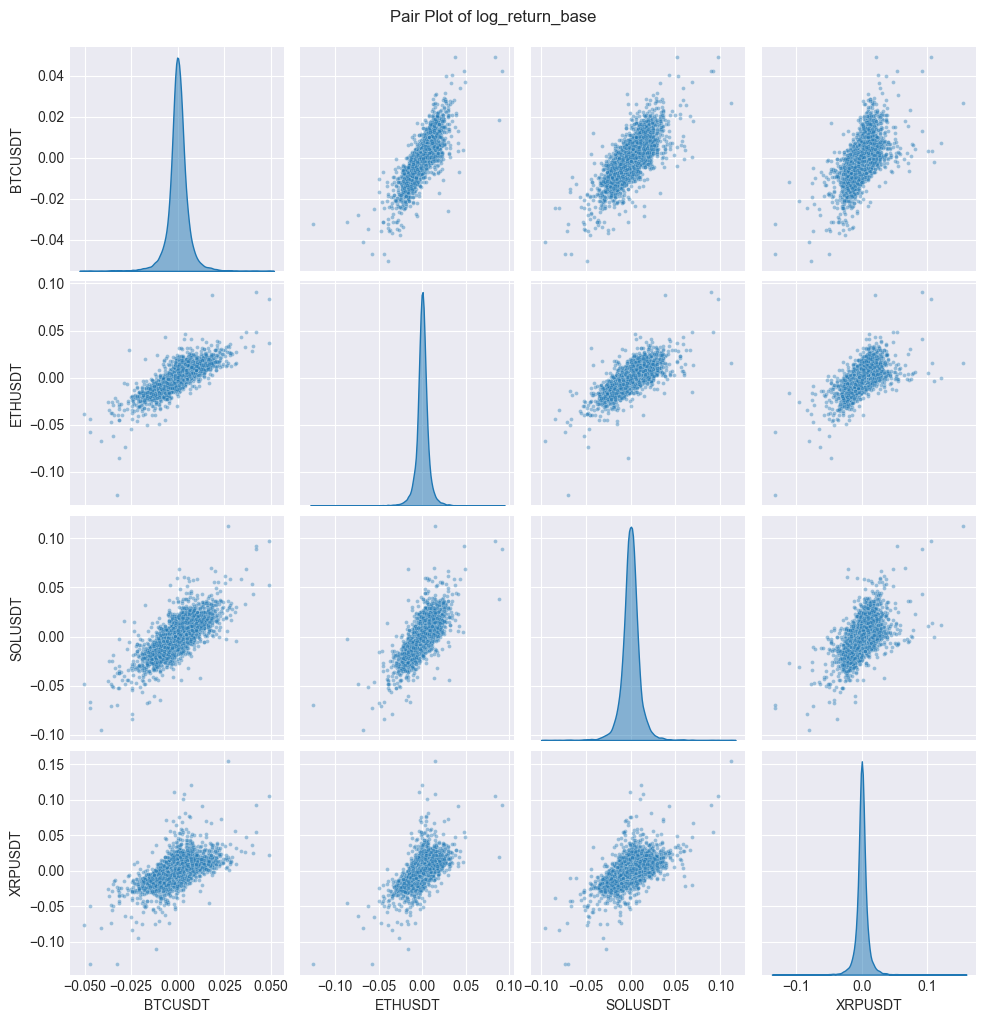

In [4]:
# Cross-Asset Return Correlation 
RETURN_FEATURE_NAME_MULTI = 'log_return_base' 

if all_features_multi:
    print(f"\n--- Analyzing Cross-Asset Correlation for '{RETURN_FEATURE_NAME_MULTI}' ---")
    returns_df_all = pd.DataFrame()
    for ticker, features_df in all_features_multi.items():
        if RETURN_FEATURE_NAME_MULTI in features_df.columns:
            returns_df_all[ticker] = features_df[RETURN_FEATURE_NAME_MULTI]
        else: print(f"Warn: '{RETURN_FEATURE_NAME_MULTI}' not found for {ticker}.")
            
    if not returns_df_all.empty and len(returns_df_all.columns) > 1:
        display(returns_df_all.head())
        returns_cleaned = returns_df_all.dropna()
        
        if len(returns_cleaned) < 2: print("Not enough overlapping data for correlation.")
        else:
            print(f"Cleaned returns for correlation: {len(returns_cleaned)} rows.")
            corr_returns = returns_cleaned.corr()
            print(f"\n--- Cross-Asset '{RETURN_FEATURE_NAME_MULTI}' Correlation Matrix ---"); display(corr_returns)
            plt.figure(figsize=(max(10, len(returns_cleaned.columns)*1.2), max(8, len(returns_cleaned.columns)*0.9)))
            sns.heatmap(corr_returns, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1); plt.title(f"Cross-Asset Correlation of '{RETURN_FEATURE_NAME_MULTI}' ({TARGET_INTERVAL_MULTI})"); plt.tight_layout(); plt.show()
            
            if len(returns_cleaned.columns) > 1:
                print("\n--- Pair Plot of Returns (Sample) ---")
                cols_pairplot = returns_cleaned.columns[:min(4, len(returns_cleaned.columns))]
                if len(cols_pairplot) > 1:
                    pairplot_fig = sns.pairplot(returns_cleaned[cols_pairplot].dropna(), kind='scatter', diag_kind='kde', height=2.5, plot_kws={'alpha':0.4, 's':8}, diag_kws={'fill':True, 'alpha':0.5})
                    pairplot_fig.fig.suptitle(f'Pair Plot of {RETURN_FEATURE_NAME_MULTI}', y=1.02); plt.show()
    elif returns_df_all.empty: print(f"No tickers had '{RETURN_FEATURE_NAME_MULTI}'.")
    else: print("Only one/no ticker with return feature, cannot compute cross-asset correlation.")
else: print("No feature data loaded. Run Cell 3.")


--- Normalized Price Performance (1h) ---


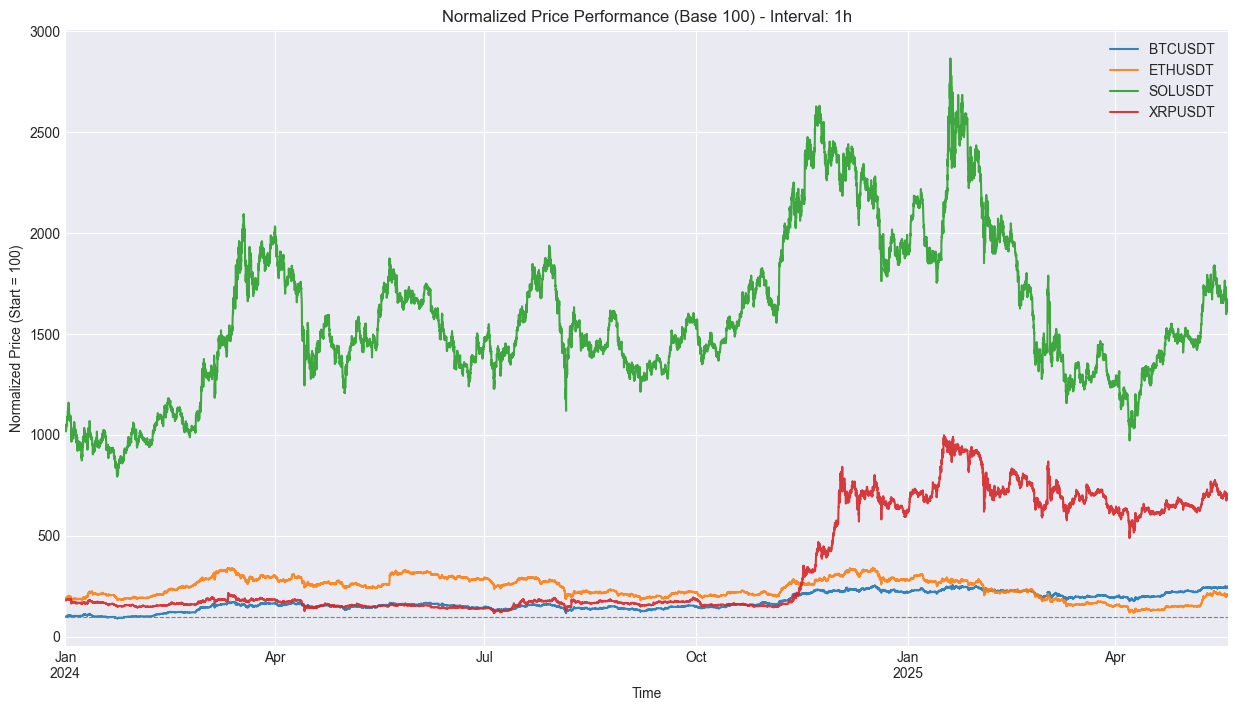

In [18]:
# Normalized Price Overlay
if all_klines_multi:
    print(f"\n--- Normalized Price Performance ({TARGET_INTERVAL_MULTI}) ---")
    normalized_prices_df = pd.DataFrame()
    for ticker, klines_df in all_klines_multi.items():
        if 'close' in klines_df.columns and not klines_df.empty:
            first_valid_close_index = klines_df['close'].first_valid_index()
            if first_valid_close_index is not None:
                first_close_price = klines_df.loc[first_valid_close_index, 'close']
                if pd.notna(first_close_price) and first_close_price != 0:
                    normalized_prices_df[ticker] = (klines_df['close'] / first_close_price) * 100
    if not normalized_prices_df.empty:
        plt.figure(figsize=(15, 8))
        for ticker_col in normalized_prices_df.columns: normalized_prices_df[ticker_col].plot(label=ticker_col, alpha=0.9)
        plt.title(f'Normalized Price Performance (Base 100) - Interval: {TARGET_INTERVAL_MULTI}')
        plt.ylabel('Normalized Price (Start = 100)'); plt.xlabel('Time'); plt.legend(); plt.grid(True)
        plt.axhline(100, color='grey', linestyle='--', linewidth=0.8); plt.show()


--- Rolling 50-P Correlation 'log_return_base' (BTCUSDT vs ETHUSDT) ---


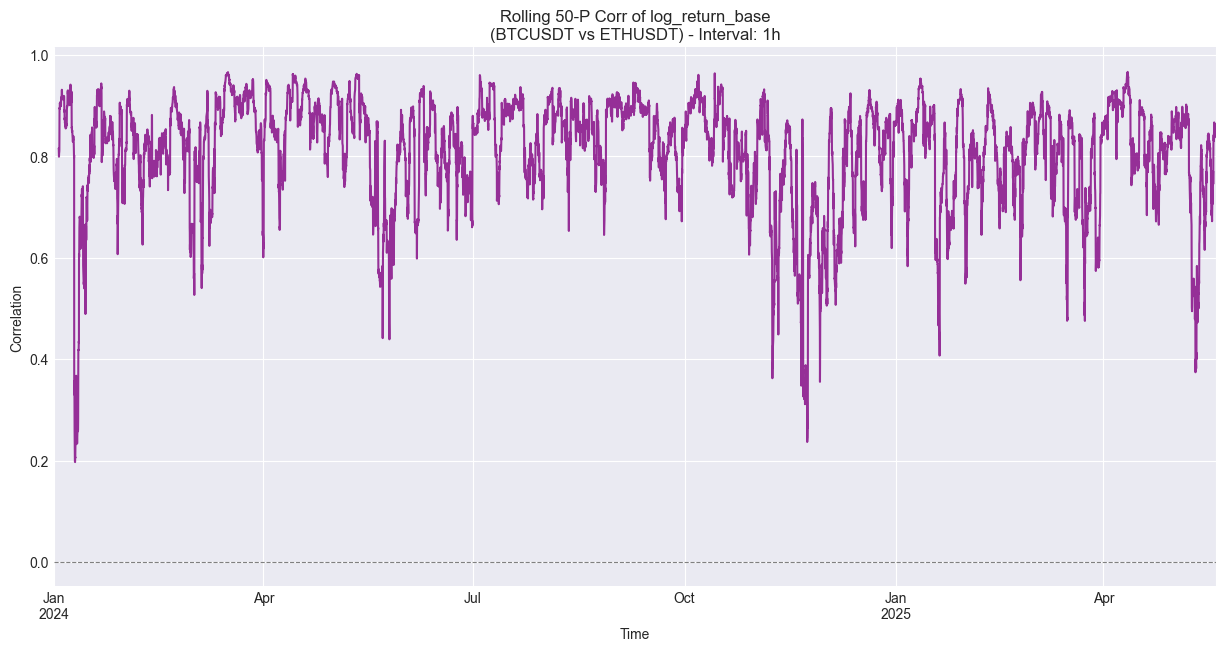

In [6]:
# Rolling Correlation Between Two Assets' Returns
TICKER_A_ROLL_CORR = TARGET_TICKERS_MULTI[0] if len(TARGET_TICKERS_MULTI) > 0 else None
TICKER_B_ROLL_CORR = TARGET_TICKERS_MULTI[1] if len(TARGET_TICKERS_MULTI) > 1 else None
ROLLING_WINDOW_CORR = 50 
RETURN_FEATURE_FOR_ROLL_CORR = 'log_return_base'

if TICKER_A_ROLL_CORR and TICKER_B_ROLL_CORR and TICKER_A_ROLL_CORR in all_features_multi and TICKER_B_ROLL_CORR in all_features_multi:
    print(f"\n--- Rolling {ROLLING_WINDOW_CORR}-P Correlation '{RETURN_FEATURE_FOR_ROLL_CORR}' ({TICKER_A_ROLL_CORR} vs {TICKER_B_ROLL_CORR}) ---")
    df_a = all_features_multi[TICKER_A_ROLL_CORR][[RETURN_FEATURE_FOR_ROLL_CORR]].rename(columns={RETURN_FEATURE_FOR_ROLL_CORR: TICKER_A_ROLL_CORR})
    df_b = all_features_multi[TICKER_B_ROLL_CORR][[RETURN_FEATURE_FOR_ROLL_CORR]].rename(columns={RETURN_FEATURE_FOR_ROLL_CORR: TICKER_B_ROLL_CORR})

    if not df_a.empty and not df_b.empty:
        merged_r = pd.merge(df_a, df_b, left_index=True, right_index=True, how='inner')
        if len(merged_r) >= ROLLING_WINDOW_CORR:
            rolling_corr = merged_r[TICKER_A_ROLL_CORR].rolling(window=ROLLING_WINDOW_CORR).corr(merged_r[TICKER_B_ROLL_CORR])
            plt.figure(figsize=(15, 7)); rolling_corr.plot(color='purple', alpha=0.8)
            plt.title(f'Rolling {ROLLING_WINDOW_CORR}-P Corr of {RETURN_FEATURE_FOR_ROLL_CORR}\n({TICKER_A_ROLL_CORR} vs {TICKER_B_ROLL_CORR}) - Interval: {TARGET_INTERVAL_MULTI}'); plt.ylabel('Correlation'); plt.xlabel('Time'); plt.axhline(0, color='grey', ls='--', lw=0.8); plt.grid(True); plt.show()
        else: print(f"Not enough data ({len(merged_r)}) for rolling window {ROLLING_WINDOW_CORR}.")
    else: print(f"Could not get '{RETURN_FEATURE_FOR_ROLL_CORR}' for {TICKER_A_ROLL_CORR} or {TICKER_B_ROLL_CORR}.")
elif not (TICKER_A_ROLL_CORR and TICKER_B_ROLL_CORR): print("Select at least two tickers for rolling correlation.")
else: print("Feature data for rolling correlation tickers not available. Run Cell 3.")


--- Comparing Volatility ('atr_14') Across Tickers ---


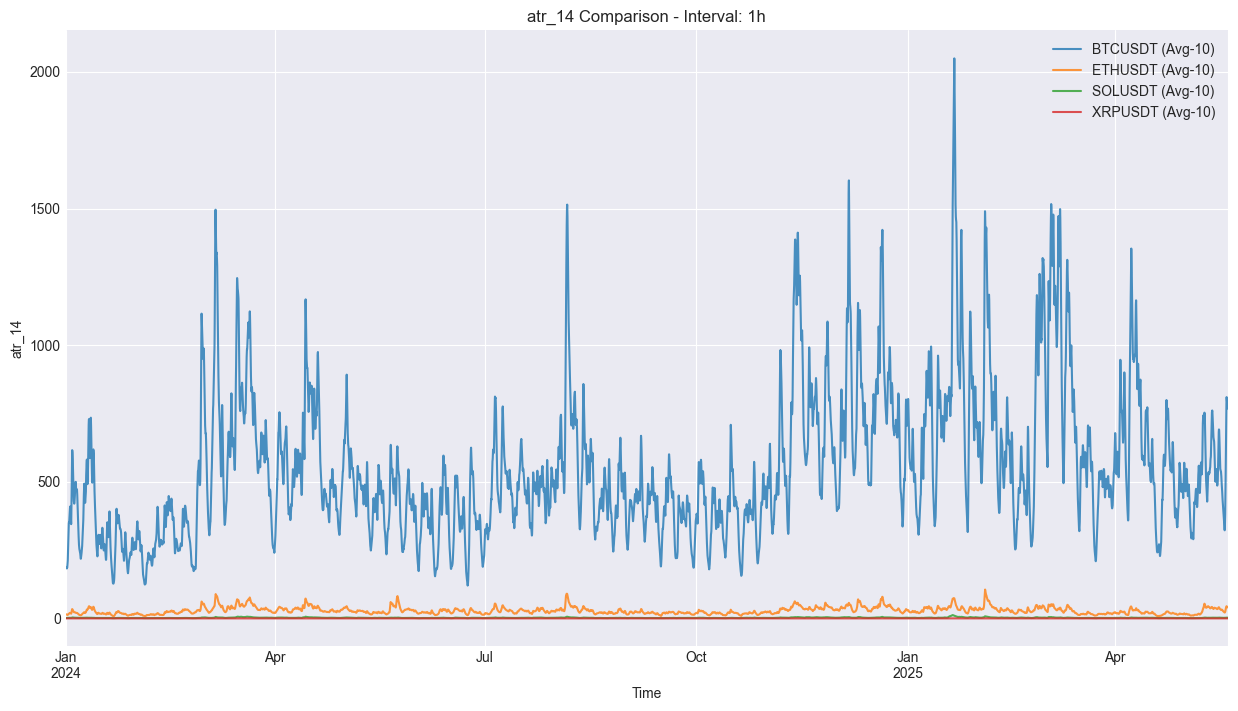

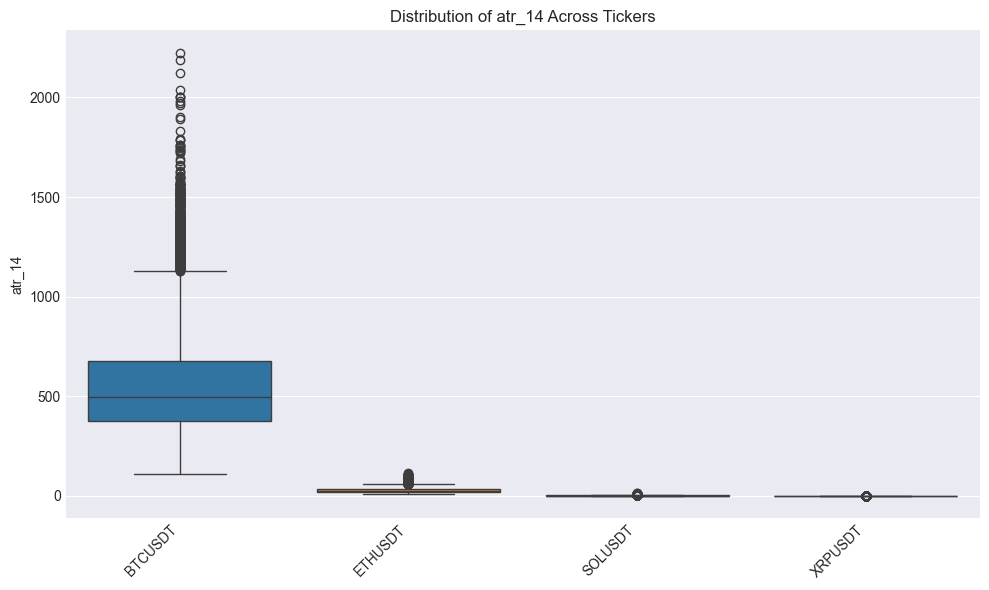

In [7]:
# Volatility Comparison
VOLATILITY_FEATURE_TO_COMPARE = 'atr_14'

if all_features_multi:
    print(f"\n--- Comparing Volatility ('{VOLATILITY_FEATURE_TO_COMPARE}') Across Tickers ---")
    vol_comp_df = pd.DataFrame()
    for ticker, features_df in all_features_multi.items():
        if VOLATILITY_FEATURE_TO_COMPARE in features_df.columns:
            vol_comp_df[ticker] = features_df[VOLATILITY_FEATURE_TO_COMPARE]
        else: print(f"Warn: '{VOLATILITY_FEATURE_TO_COMPARE}' not found for {ticker}.")

    if not vol_comp_df.empty:
        plt.figure(figsize=(15, 8))
        for col in vol_comp_df.columns: vol_comp_df[col].rolling(window=10, min_periods=1).mean().plot(label=f'{col} (Avg-10)', alpha=0.8)
        plt.title(f'{VOLATILITY_FEATURE_TO_COMPARE} Comparison - Interval: {TARGET_INTERVAL_MULTI}'); plt.ylabel(VOLATILITY_FEATURE_TO_COMPARE); plt.xlabel('Time'); plt.legend(); plt.grid(True); plt.show()
        
        if len(vol_comp_df.columns) > 0:
            plt.figure(figsize=(max(10, len(vol_comp_df.columns) * 1.5), 6))
            sns.boxplot(data=vol_comp_df.dropna(how='all')) # Drop columns that are all NaN
            plt.title(f'Distribution of {VOLATILITY_FEATURE_TO_COMPARE} Across Tickers'); plt.ylabel(VOLATILITY_FEATURE_TO_COMPARE); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()
    else: print(f"No data for volatility feature '{VOLATILITY_FEATURE_TO_COMPARE}'.")
else: print("No feature data loaded. Run Cell 3.")


--- Distribution of 'rsi_14' Across Tickers ---


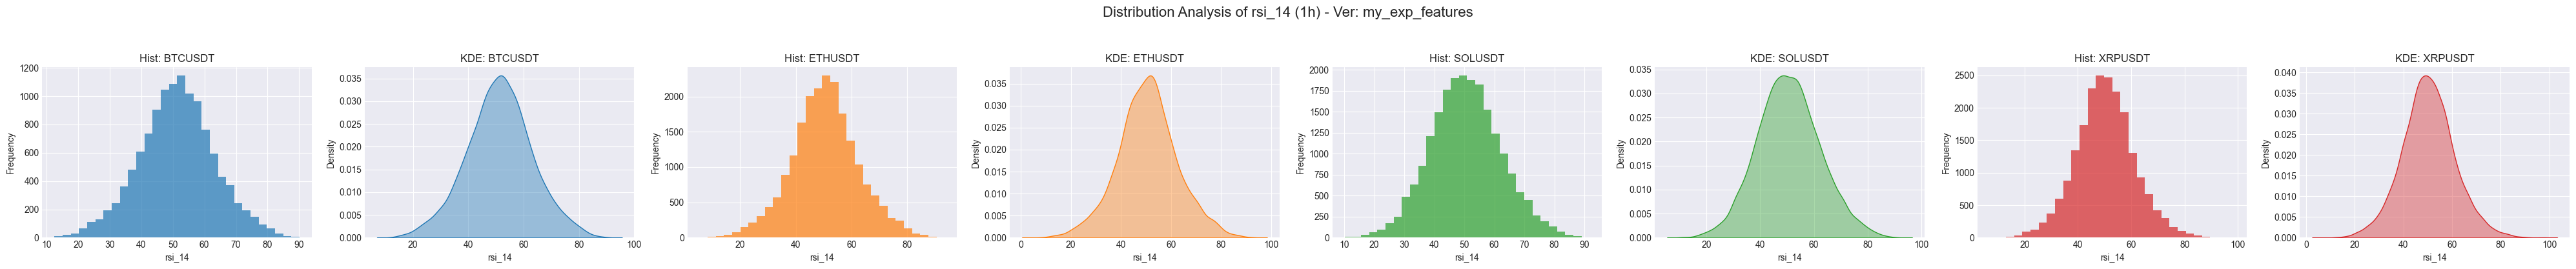

In [8]:
# Distribution of a Specific Feature Across Tickers
FEATURE_FOR_DIST_PLOT = 'rsi_14'

if all_features_multi:
    print(f"\n--- Distribution of '{FEATURE_FOR_DIST_PLOT}' Across Tickers ---")
    tickers_with_feature_dist = [t for t in TARGET_TICKERS_MULTI if t in all_features_multi and FEATURE_FOR_DIST_PLOT in all_features_multi[t].columns]
    
    if tickers_with_feature_dist:
        num_cols_dist_plot = min(len(tickers_with_feature_dist), 4) # Max 4 tickers per row for readability
        num_rows_dist_plot = (len(tickers_with_feature_dist) - 1) // num_cols_dist_plot + 1
        
        fig, axes = plt.subplots(num_rows_dist_plot, num_cols_dist_plot * 2, figsize=(5 * num_cols_dist_plot * 2, 4 * num_rows_dist_plot), squeeze=False)
        fig.suptitle(f'Distribution Analysis of {FEATURE_FOR_DIST_PLOT} ({TARGET_INTERVAL_MULTI}) - Ver: {TARGET_FEATURE_SET_VERSION_MULTI}', fontsize=16, y=1.03)

        for i, ticker in enumerate(tickers_with_feature_dist):
            row_idx, col_base_idx = divmod(i, num_cols_dist_plot)
            hist_ax = axes[row_idx, col_base_idx * 2]
            kde_ax = axes[row_idx, col_base_idx * 2 + 1]

            # Histogram
            all_features_multi[ticker][FEATURE_FOR_DIST_PLOT].hist(bins=30, alpha=0.7, ax=hist_ax, label=ticker, color=f'C{i}')
            hist_ax.set_title(f'Hist: {ticker}'); hist_ax.set_xlabel(FEATURE_FOR_DIST_PLOT); hist_ax.set_ylabel('Frequency'); hist_ax.grid(True)
            
            # KDE Plot
            sns.kdeplot(all_features_multi[ticker][FEATURE_FOR_DIST_PLOT].dropna(), ax=kde_ax, label=ticker, fill=True, alpha=0.4, color=f'C{i}')
            kde_ax.set_title(f'KDE: {ticker}'); kde_ax.set_xlabel(FEATURE_FOR_DIST_PLOT); kde_ax.set_ylabel('Density'); kde_ax.grid(True)

        # Hide any unused subplots
        total_plots_drawn = len(tickers_with_feature_dist)
        for i in range(total_plots_drawn * 2, num_rows_dist_plot * num_cols_dist_plot * 2):
            row_idx_empty, col_idx_empty = divmod(i, num_cols_dist_plot * 2)
            if row_idx_empty < axes.shape[0] and col_idx_empty < axes.shape[1]: # Check bounds
                 axes[row_idx_empty, col_idx_empty].set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
    else: print(f"Feature '{FEATURE_FOR_DIST_PLOT}' not found in any loaded ticker data.")
else: print("No feature data loaded. Run Cell 3.")


--- Top/Bottom Performers (Cumulative Log Returns) - Interval: 1h ---
Period: 2023-01-01 00:00:00 to 2025-05-20 00:00:00

--- Performance Ranking (Cumulative Log Return -> Pct Change) ---


,Ticker,Cumulative_Log_Return,Total_Pct_Change
0,SOLUSDT,2.8171,1572.77%
1,XRPUSDT,1.9488,602.04%
2,BTCUSDT,0.9119,148.92%
3,ETHUSDT,0.7450,110.65%


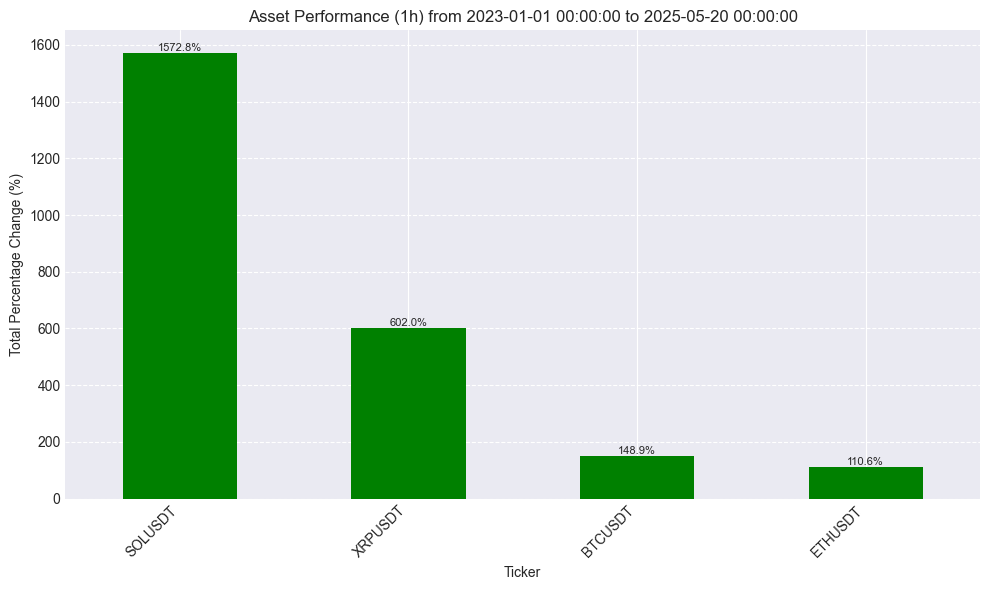

In [9]:
# Top/Bottom Performers
# Based on cumulative log returns from kline data

if all_klines_multi:
    print(f"\n--- Top/Bottom Performers (Cumulative Log Returns) - Interval: {TARGET_INTERVAL_MULTI} ---")
    print(f"Period: {FETCH_START_DATE_MULTI} to {FETCH_END_DATE_MULTI}")

    performance = {}
    for ticker, klines_df in all_klines_multi.items():
        if 'close' in klines_df.columns and not klines_df.empty:
            # Calculate log returns for this specific kline_df
            log_returns_ticker = np.log(klines_df['close'] / klines_df['close'].shift(1))
            cumulative_log_return = log_returns_ticker.sum()
            if pd.notna(cumulative_log_return):
                performance[ticker] = cumulative_log_return
            else:
                print(f"Warn: Could not calculate cumulative return for {ticker} (NaN result).")
        else:
            print(f"Warn: No 'close' data for {ticker} to calculate performance.")
            
    if performance:
        performance_series = pd.Series(performance).sort_values(ascending=False)
        
        # Convert cumulative log return to percentage change for easier interpretation
        # Total Pct Change = (exp(cumulative_log_return) - 1) * 100
        performance_pct_series = (np.exp(performance_series) - 1) * 100

        print("\n--- Performance Ranking (Cumulative Log Return -> Pct Change) ---")
        perf_df = pd.DataFrame({'Ticker': performance_pct_series.index, 
                                'Cumulative_Log_Return': performance_series.values,
                                'Total_Pct_Change': performance_pct_series.values})
        display(perf_df.style.format({'Cumulative_Log_Return': '{:.4f}', 'Total_Pct_Change': '{:.2f}%'}))

        # Bar plot of performance
        plt.figure(figsize=(max(10, len(performance_pct_series)*0.8) , 6))
        bars = performance_pct_series.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in performance_pct_series.values])
        plt.title(f'Asset Performance ({TARGET_INTERVAL_MULTI}) from {FETCH_START_DATE_MULTI} to {FETCH_END_DATE_MULTI}')
        plt.ylabel('Total Percentage Change (%)')
        plt.xlabel('Ticker')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--')
        # Add labels to bars
        for bar in bars.patches:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + np.sign(yval)*0.5, f'{yval:.1f}%', ha='center', va='bottom' if yval >=0 else 'top', fontsize=8)
        plt.tight_layout()
        plt.show()
    else:
        print("No performance data calculated.")
else:
    print("Kline data (`all_klines_multi`) not loaded for performance analysis. Run Cell 3.")


--- Distribution of 'rsi_14' Across Tickers ---


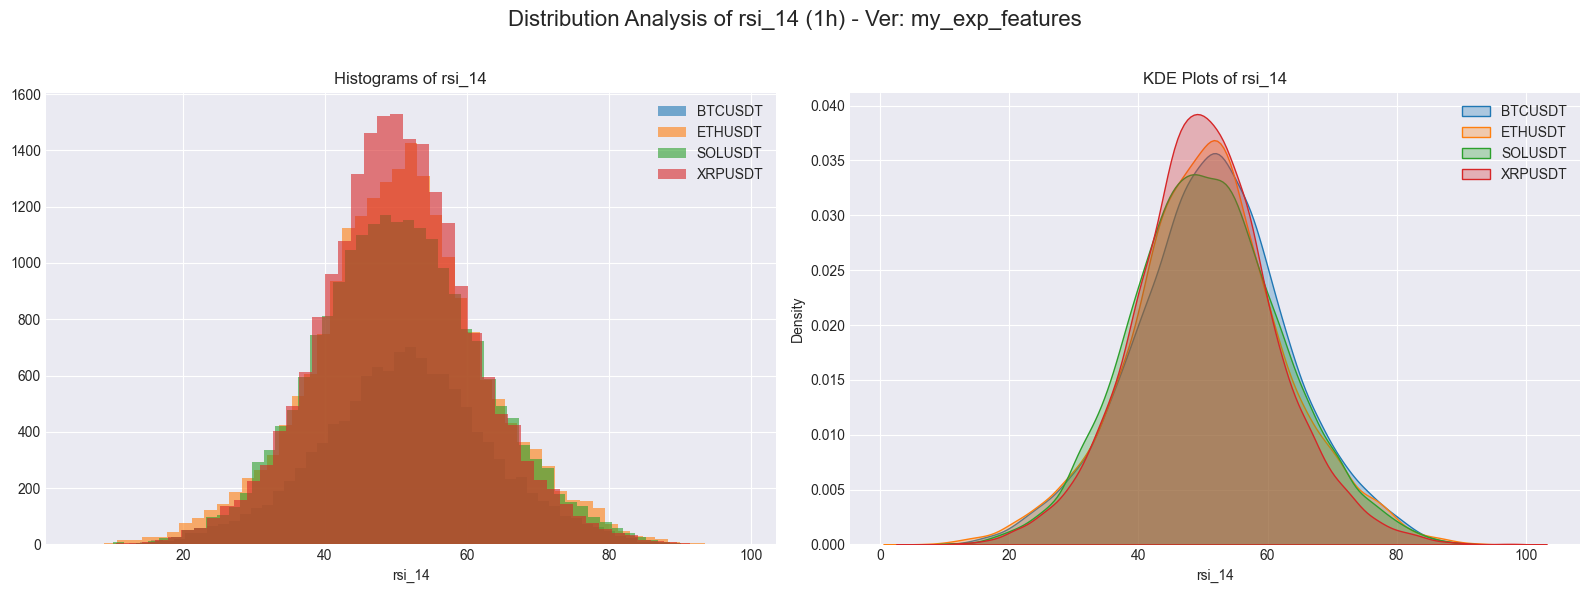

In [ ]:
# Distribution of a Specific Feature Across Tickers
FEATURE_FOR_DIST_PLOT = 'rsi_14' 

if all_features_multi:
    print(f"\n--- Distribution of '{FEATURE_FOR_DIST_PLOT}' Across Tickers ---")
    num_tickers_with_feature = sum(1 for t in TARGET_TICKERS_MULTI if t in all_features_multi and FEATURE_FOR_DIST_PLOT in all_features_multi[t].columns)
    if num_tickers_with_feature > 0:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        for ticker in TARGET_TICKERS_MULTI:
            if ticker in all_features_multi and FEATURE_FOR_DIST_PLOT in all_features_multi[ticker].columns:
                all_features_multi[ticker][FEATURE_FOR_DIST_PLOT].hist(bins=50, alpha=0.6, ax=axes[0], label=ticker)
                sns.kdeplot(all_features_multi[ticker][FEATURE_FOR_DIST_PLOT].dropna(), ax=axes[1], label=ticker, fill=True, alpha=0.3)
        axes[0].set_title(f'Histograms of {FEATURE_FOR_DIST_PLOT}'); axes[0].set_xlabel(FEATURE_FOR_DIST_PLOT); axes[0].legend(); axes[0].grid(True)
        axes[1].set_title(f'KDE Plots of {FEATURE_FOR_DIST_PLOT}'); axes[1].set_xlabel(FEATURE_FOR_DIST_PLOT); axes[1].legend(); axes[1].grid(True)
        plt.suptitle(f'Distribution Analysis of {FEATURE_FOR_DIST_PLOT} ({TARGET_INTERVAL_MULTI}) - Ver: {TARGET_FEATURE_SET_VERSION_MULTI}', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

In [13]:
# Average Feature Values Table 

# Select a few key features to summarize
KEY_FEATURES_FOR_SUMMARY = [
    'log_return_base', 
    'rsi_14', 
    'atr_14', 
    'volatility_std_20p', 
    'macd_hist_12_26_9'
]

if all_features_multi:
    print(f"\n--- Average Feature Values Summary (Period: {FETCH_START_DATE_MULTI} to {FETCH_END_DATE_MULTI}) ---")
    
    summary_data = []
    for ticker, features_df in all_features_multi.items():
        ticker_summary = {'Ticker': ticker}
        for feature in KEY_FEATURES_FOR_SUMMARY:
            if feature in features_df.columns:
                ticker_summary[f'Mean_{feature}'] = features_df[feature].mean()
                ticker_summary[f'Median_{feature}'] = features_df[feature].median()
                ticker_summary[f'Std_{feature}'] = features_df[feature].std()
            else:
                ticker_summary[f'Mean_{feature}'] = np.nan
                ticker_summary[f'Median_{feature}'] = np.nan
                ticker_summary[f'Std_{feature}'] = np.nan
        summary_data.append(ticker_summary)
        
    if summary_data:
        summary_df = pd.DataFrame(summary_data).set_index('Ticker')
        display(summary_df.style.background_gradient(cmap='Blues', axis=0, subset=[col for col in summary_df.columns if 'Mean' in col])
                                .format("{:.4f}")
                                .set_caption("Average Feature Values"))
    else:
        print("No data to create summary table.")
else:
    print("No feature data loaded for summary. Run Cell 3 first.")


--- Average Feature Values Summary (Period: 2023-01-01 00:00:00 to 2025-05-20 00:00:00) ---


,Mean_log_return_base,Median_log_return_base,Std_log_return_base,Mean_rsi_14,Median_rsi_14,Std_rsi_14,Mean_atr_14,Median_atr_14,Std_atr_14,Mean_volatility_std_20p,Median_volatility_std_20p,Std_volatility_std_20p,Mean_macd_hist_12_26_9,Median_macd_hist_12_26_9,Std_macd_hist_12_26_9
Ticker,,,,,,,,,,,,,,,
BTCUSDT,0.0001,0.0001,0.0056,51.2864,51.3792,11.9068,553.8755,494.6302,268.2755,0.0050,0.0045,0.0026,-0.1435,-3.5692,139.9689
ETHUSDT,0.0000,0.0001,0.0065,50.5709,50.5164,11.9986,21.4531,18.2625,13.3923,0.0056,0.0050,0.0033,0.0019,-0.0302,5.8508
SOLUSDT,0.0001,0.0000,0.0102,50.5666,50.2673,11.7583,1.5179,1.4177,1.3031,0.0091,0.0079,0.0047,-0.0001,-0.0012,0.4140
XRPUSDT,0.0001,0.0002,0.0092,50.2197,50.0166,10.8821,0.0125,0.0051,0.0173,0.0073,0.0056,0.0057,-0.0000,-0.0000,0.0046



--- Scatter Matrix for BTCUSDT Features ---
Plotting scatter matrix for columns: ['log_return_base', 'rsi_14', 'atr_14', 'volume_base']


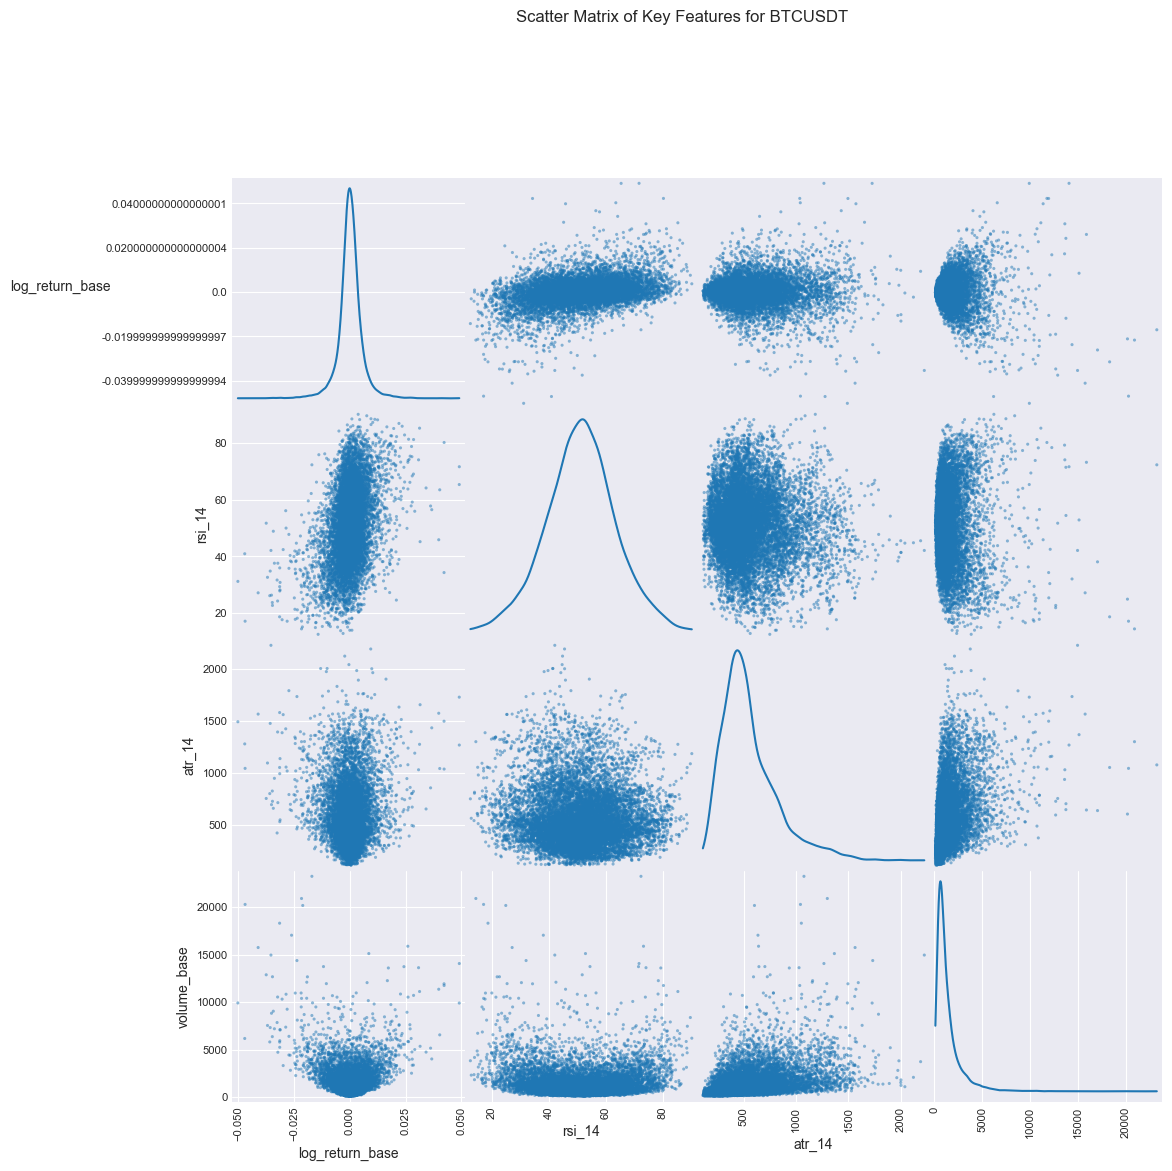

In [ ]:
# Scatter Matrix of Key Features for a Specific Ticker 

# Choose one ticker from your list for a detailed scatter matrix
TICKER_FOR_SCATTER_MATRIX = TARGET_TICKERS_MULTI[0] if TARGET_TICKERS_MULTI else None
FEATURES_FOR_SCATTER_MATRIX = [
    'log_return_base',
    'rsi_14',
    'atr_14',
    'volume_base', 
    # Add 1-2 more key features that you expect might interact
]

if TICKER_FOR_SCATTER_MATRIX and TICKER_FOR_SCATTER_MATRIX in all_features_multi:
    print(f"\n--- Scatter Matrix for {TICKER_FOR_SCATTER_MATRIX} Features ---")
    
    df_for_scatter = all_features_multi[TICKER_FOR_SCATTER_MATRIX]
    
    # Filter to only existing columns from FEATURES_FOR_SCATTER_MATRIX
    existing_cols_for_scatter = [col for col in FEATURES_FOR_SCATTER_MATRIX if col in df_for_scatter.columns]
    
    if len(existing_cols_for_scatter) > 1:
        # Drop NaNs for scatter_matrix to avoid issues
        scatter_data = df_for_scatter[existing_cols_for_scatter].dropna()
        
        if len(scatter_data) > 10: # Need enough data points
            print(f"Plotting scatter matrix for columns: {existing_cols_for_scatter}")
            axs = scatter_matrix(scatter_data, alpha=0.5, figsize=(12, 12), diagonal='kde', s=20)
            
            # Prettify diagonal (KDE) plots
            for i, col_name in enumerate(existing_cols_for_scatter):
                ax_diag = axs[i, i]
                ax_diag.set_ylabel(col_name, rotation=0, labelpad=30, fontsize=10) # Adjust label position
                ax_diag.set_xlabel("", visible=False) # Remove x-label for diagonal
                ax_diag.tick_params(axis='y', labelsize=8)

            plt.suptitle(f'Scatter Matrix of Key Features for {TICKER_FOR_SCATTER_MATRIX}', y=1.02)
            plt.show()
        else:
            print(f"Not enough data points after dropping NaNs for scatter matrix ({len(scatter_data)} rows).")
    else:
        print(f"Not enough valid features found in data for {TICKER_FOR_SCATTER_MATRIX} to create a scatter matrix.")
        print(f"  Requested: {FEATURES_FOR_SCATTER_MATRIX}")
        print(f"  Available: {df_for_scatter.columns.tolist()}")
        
elif not TICKER_FOR_SCATTER_MATRIX:
    print("No ticker selected for scatter matrix (TARGET_TICKERS_MULTI is empty).")
else:
    print(f"Data for {TICKER_FOR_SCATTER_MATRIX} not found in all_features_multi. Run Cell 3.")

In [19]:
# Cell 6: Dispose SQLAlchemy Engine Connections
dispose_sa_engine_connections()
print("SQLAlchemy engine connections for analysis module disposed.")

SQLAlchemy engine connections disposed (analysis utilities).
SQLAlchemy engine connections for analysis module disposed.
